In [9]:
from pathlib import Path
from matplotlib import pyplot as plt
from collections import defaultdict
from datetime import datetime as dt
from bs4 import BeautifulSoup as bs
from IPython.core.display import HTML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter

In [10]:
df = pd.read_csv('batterieDataPériode1.csv', low_memory = False)
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df


KeyboardInterrupt: 

In [11]:
df

KeyboardInterrupt: 

In [12]:
df['Batt_Li_Voltage'].describe()

count    2.937599e+06
mean     2.579744e+01
std      3.806765e+00
min     -2.370000e-01
25%      2.558000e+01
50%      2.634000e+01
75%      2.681000e+01
max      2.888000e+01
Name: Batt_Li_Voltage, dtype: float64

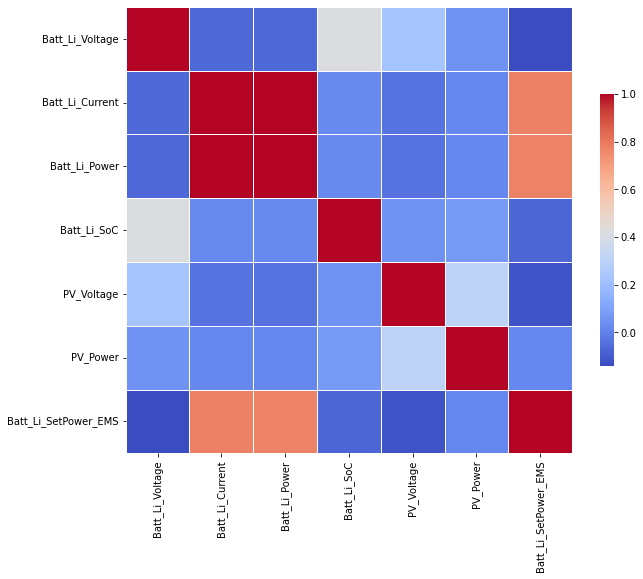

In [6]:
df_normalized = df.drop(['TIMESTAMP'],axis=1)
scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df_normalized))
cols = df.columns[1:]
df_normalized.columns = cols

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df_normalized.corr(), cmap='coolwarm', fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.show()

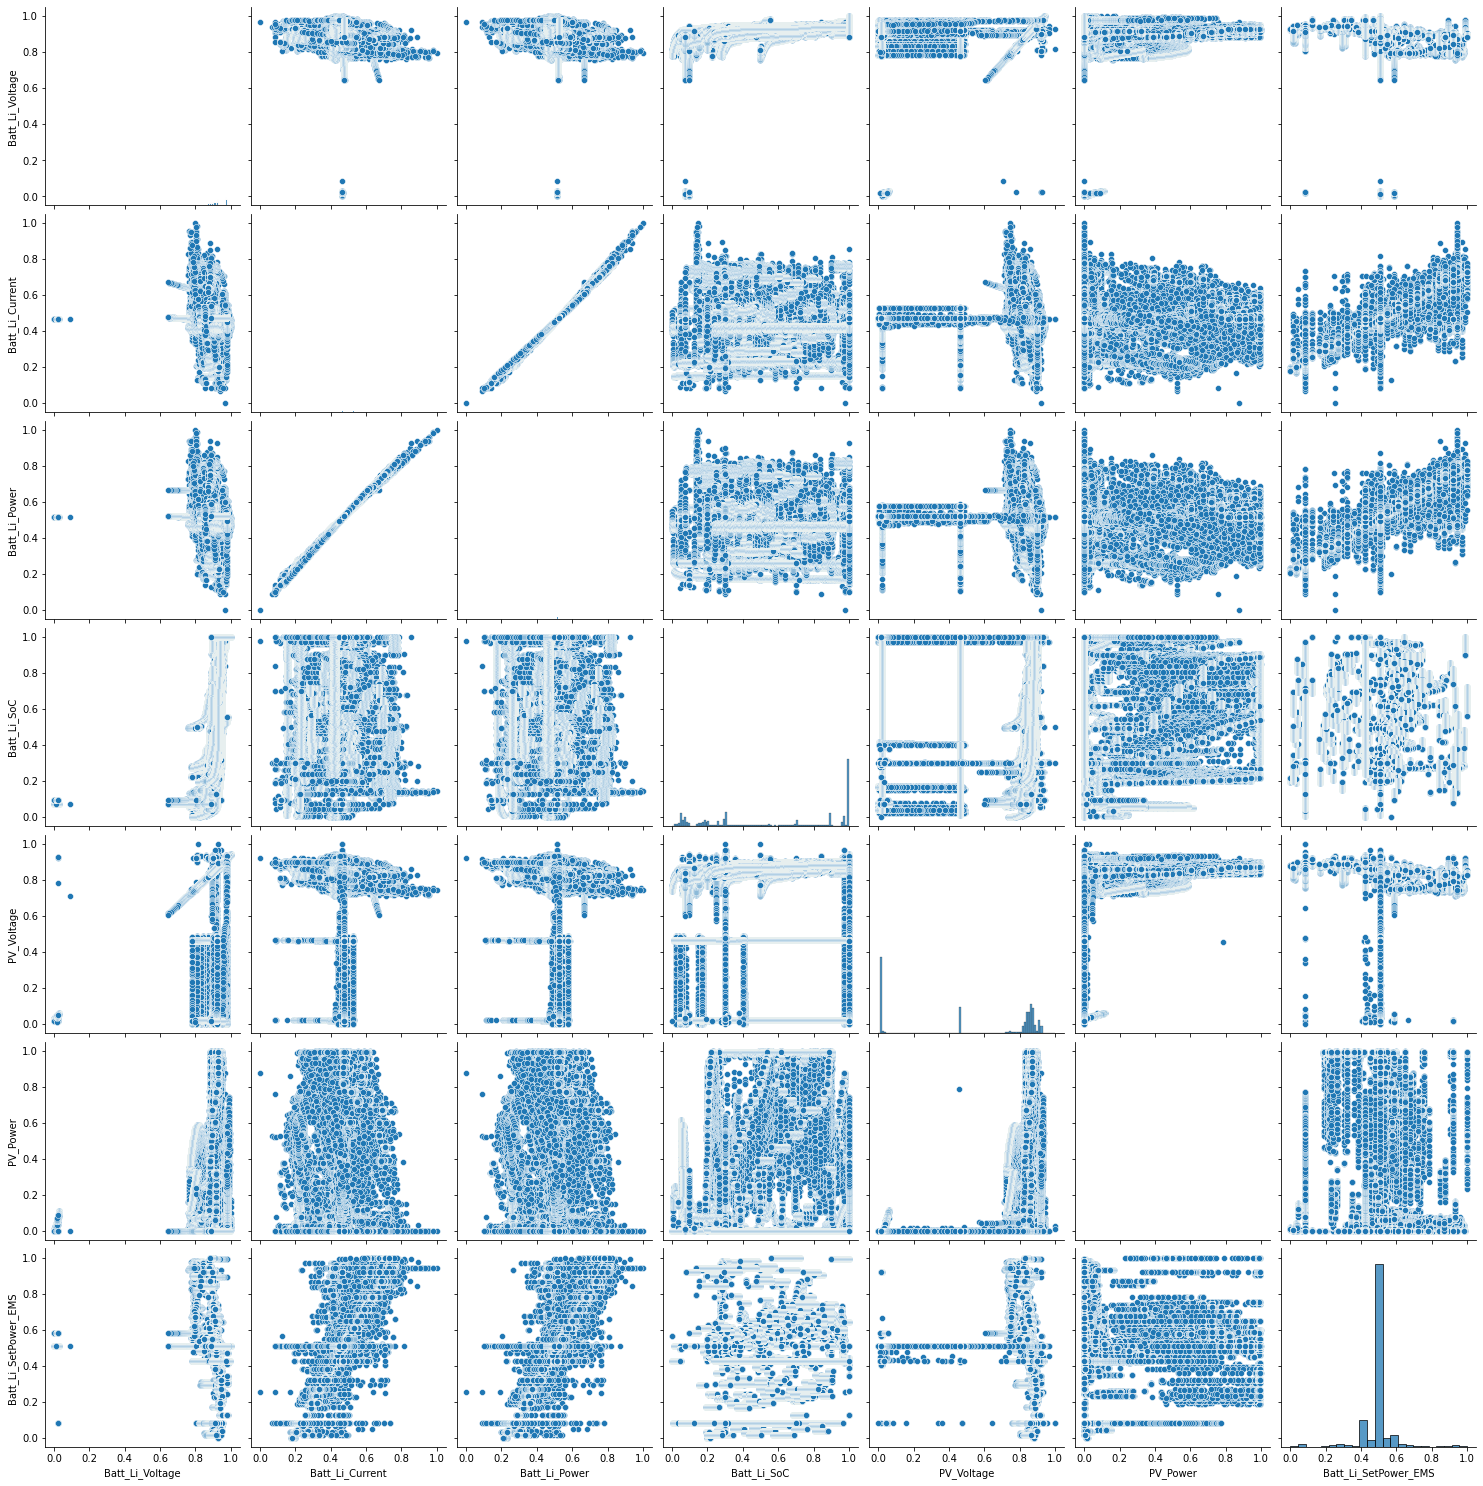

In [9]:
sns.pairplot(df_normalized, height=3)

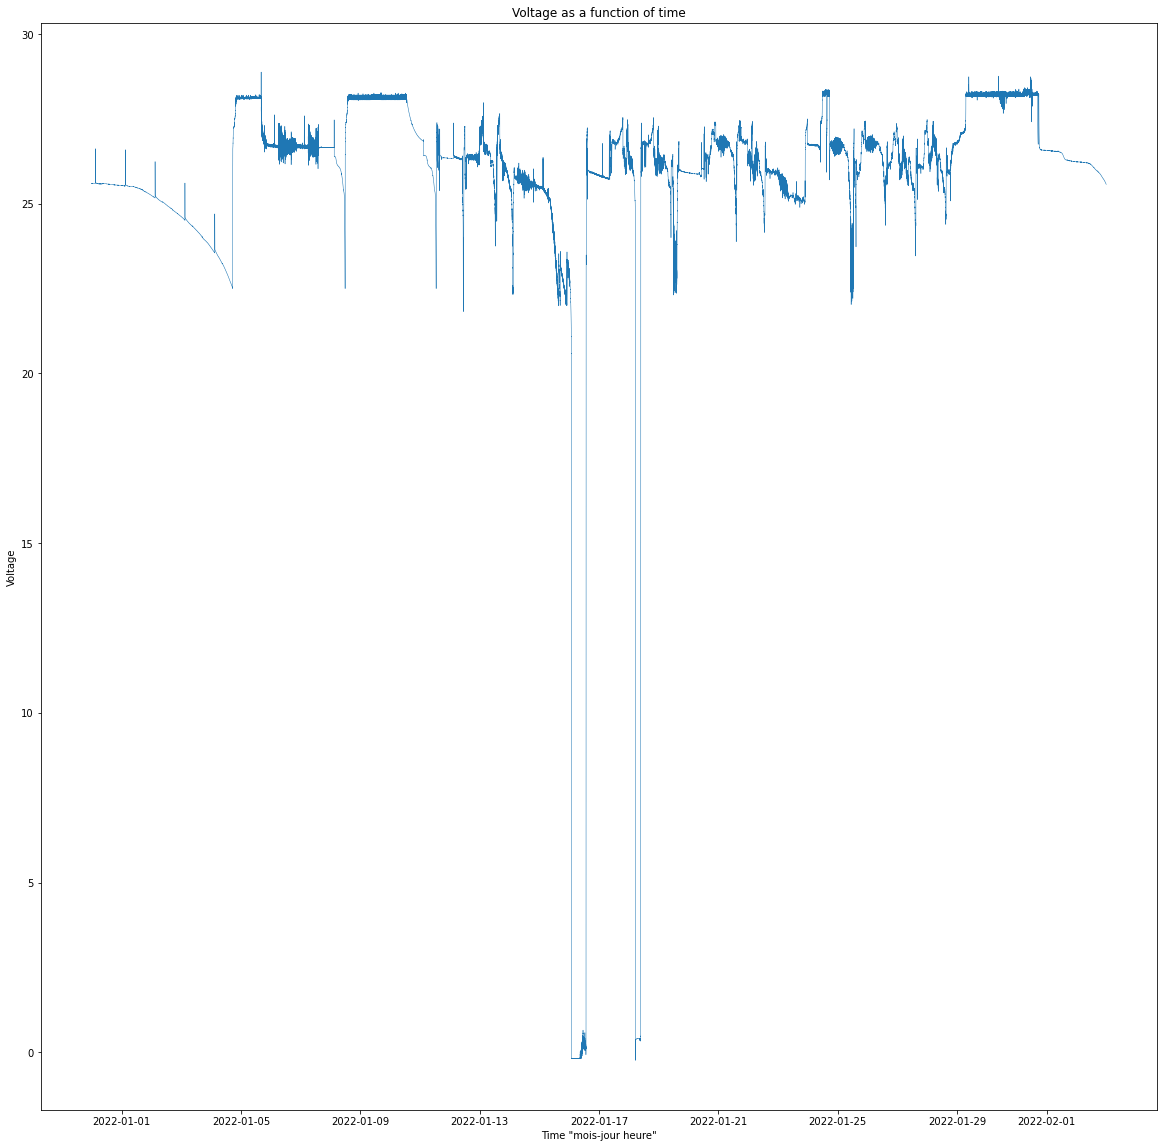

In [3]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(df['TIMESTAMP'], df['Batt_Li_Voltage'],linewidth=0.5, markersize=0.05)

ax.set_title('Voltage as a function of time')
ax.set_xlabel('Time "mois-jour heure"')
ax.set_ylabel('Voltage')
fig.savefig('Voltage as a function of time during first period')

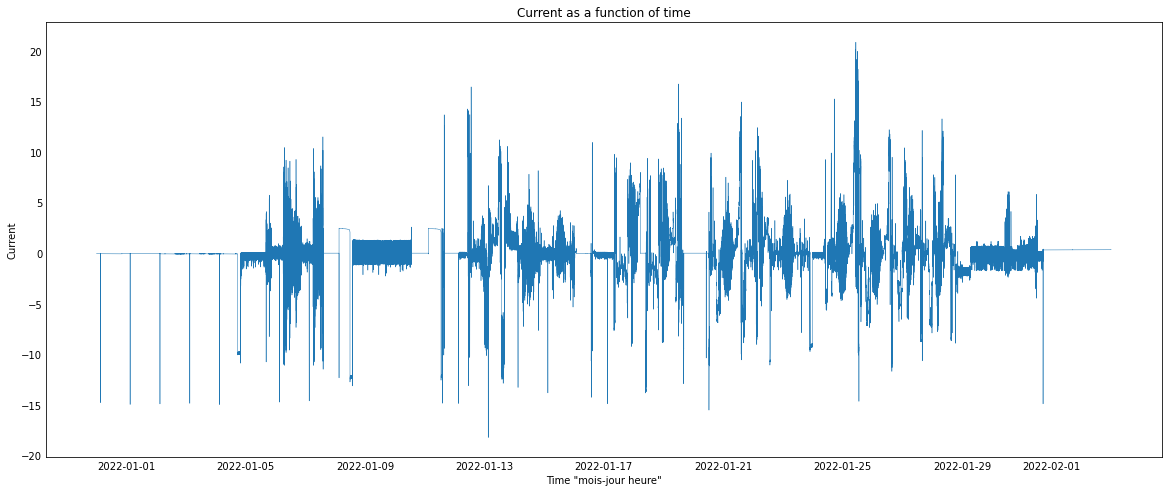

In [17]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df['TIMESTAMP'], df['Batt_Li_Current'],linewidth=0.5, markersize=0.05)

ax.set_title('Current as a function of time')
ax.set_xlabel('Time "mois-jour heure"')
ax.set_ylabel('Current')
ax.tick_params(axis='both', which='both', length=0)
fig.savefig('Current as a function of time during first period')

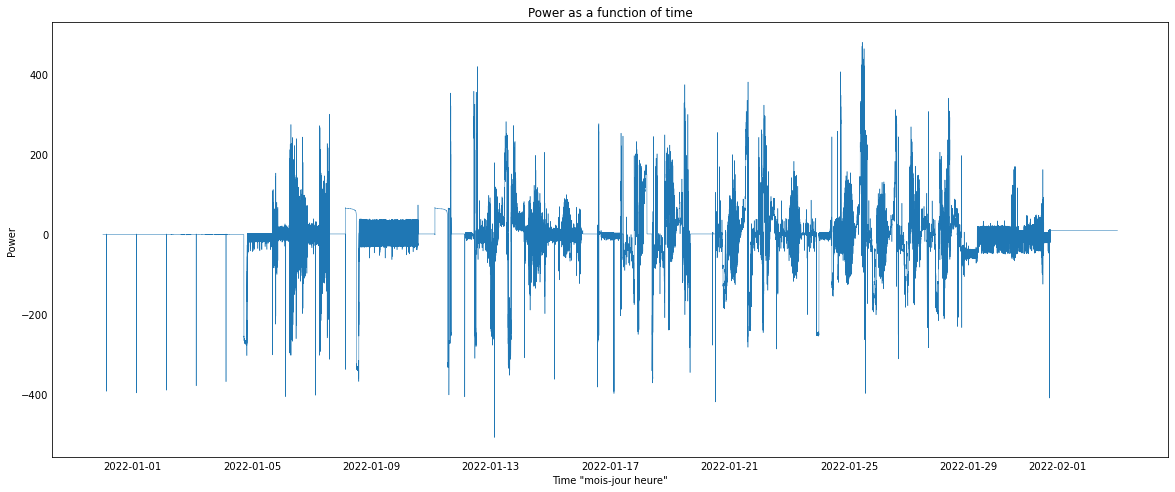

In [16]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df['TIMESTAMP'], df['Batt_Li_Power'],linewidth=0.5, markersize=0.05)

ax.set_title('Power as a function of time')
ax.set_xlabel('Time "mois-jour heure"')
ax.set_ylabel('Power')
ax.tick_params(axis='both', which='both', length=0)
fig.savefig('Power as a function of time during first period')

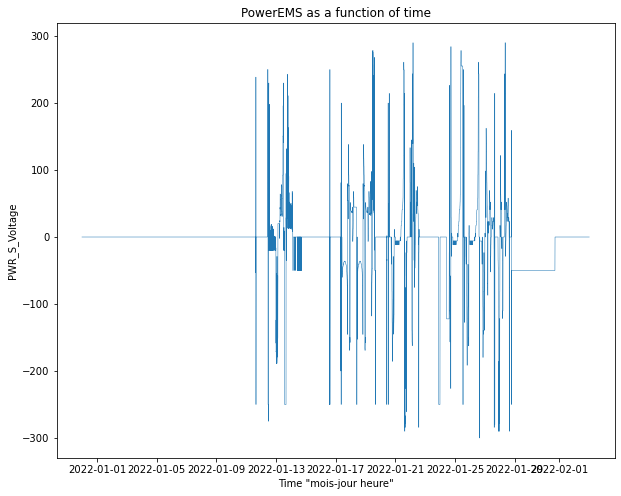

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(df['TIMESTAMP'], df['Batt_Li_SetPower_EMS'], linewidth=0.5, markersize=0.05)

ax.set_title('PowerEMS as a function of time')
ax.set_xlabel('Time "mois-jour heure"')
ax.set_ylabel('PWR_S_Voltage')
fig.savefig('Power EMS as a function of time during first period')

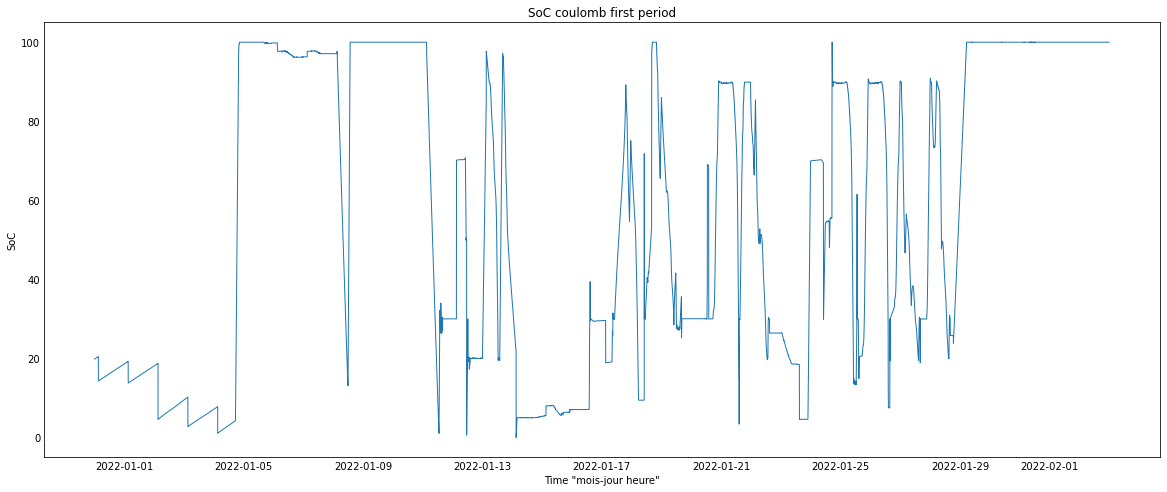

In [6]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df['TIMESTAMP'], df['Batt_Li_SoC'],linewidth=1, markersize=0.5)

ax.set_title('SoC coulomb first period')
ax.set_xlabel('Time "mois-jour heure"')
ax.set_ylabel('SoC')
ax.tick_params(axis='both', which='both', length=0)
fig.savefig('SoC as a function of time during first period')

In [3]:
C_nom = 20
def state_of_charge(df):
    I = df['Batt_Li_Current']  # courant aux bornes de la batterie
    V = df['Batt_Li_Voltage']  # tension aux bornes de la batterie
    t = (df['TIMESTAMP'] - df['TIMESTAMP'].iloc[0]).dt.total_seconds()  # temps écoulé depuis le début des mesures en secondes
    Q = np.cumsum(I) * (t.diff().fillna(1))  # charge totale en Ah
    SOC = -(Q / C_nom)/100  # état de charge en pourcentage
    return SOC
df1 = df
df1['SoC_Tension'] = state_of_charge(df)
max_variation = 10
variations = df1['SoC_Tension'].diff()

lignes_a_supprimer = df1.loc[variations > max_variation].index
df1 = df1.drop(lignes_a_supprimer)

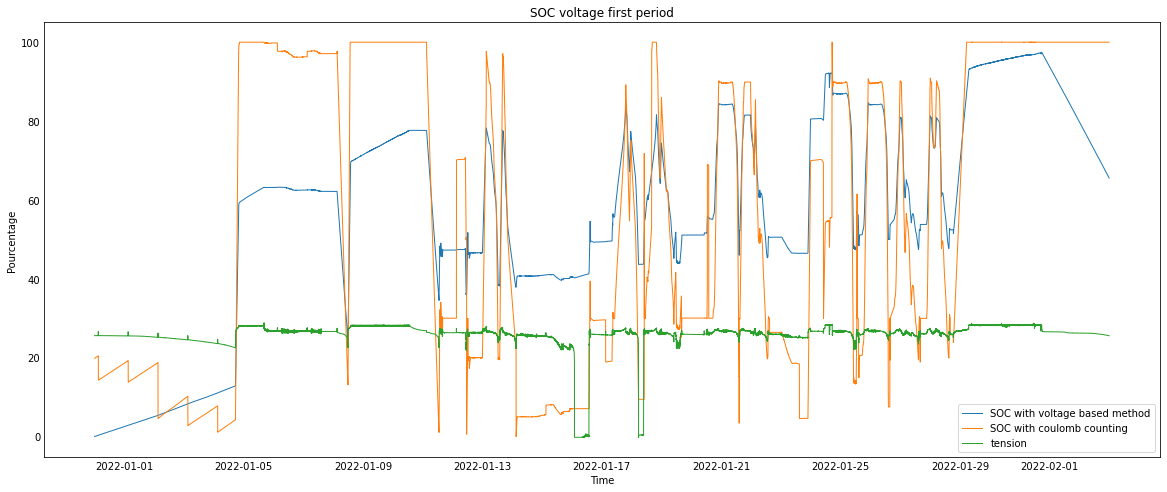

In [6]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df1['TIMESTAMP'], df1['SoC_Tension'], label='SOC with voltage based method',linewidth=1)
ax.plot(df['TIMESTAMP'], df['Batt_Li_SoC'],label='SOC with coulomb counting',linewidth=1, markersize=0.5)
ax.plot(df1['TIMESTAMP'], df1['Batt_Li_Voltage'], label='tension',linewidth=1)

ax.set_title('SOC voltage first period')
ax.set_xlabel('Time')
ax.set_ylabel('Pourcentage')
ax.tick_params(axis='both', which='both', length=0)
fig.savefig('SoC determined with tension as a function of SoC during first period')
plt.legend()

In [8]:
df

,TIMESTAMP,Batt_Li_Voltage,Batt_Li_Current,Batt_Li_Power,Batt_Li_SoC,PV_Voltage,PV_Power,Batt_Li_SetPower_EMS,SoC_Tension
0,2021-12-30 23:59:59,25.60,-0.058,-1.48,19.85,0.040,0,0.0,0.000029
1,2021-12-31 00:00:00,25.60,-0.058,-1.48,19.85,0.039,0,0.0,0.000058
2,2021-12-31 00:00:01,25.60,-0.058,-1.48,19.85,0.039,0,0.0,0.000087
3,2021-12-31 00:00:02,25.59,-0.058,-1.48,19.85,0.039,0,0.0,0.000116
4,2021-12-31 00:00:03,25.60,-0.059,-1.51,19.85,0.039,0,0.0,0.000146
...,...,...,...,...,...,...,...,...,...
2937594,2022-02-02 23:59:55,25.57,0.338,8.64,100.00,0.004,0,0.0,65.567427
2937595,2022-02-02 23:59:56,25.57,0.338,8.64,100.00,0.004,0,0.0,65.567258
2937596,2022-02-02 23:59:57,25.57,0.338,8.64,100.00,0.004,0,0.0,65.567089
2937597,2022-02-02 23:59:58,25.57,0.338,8.64,100.00,0.004,0,0.0,65.566920


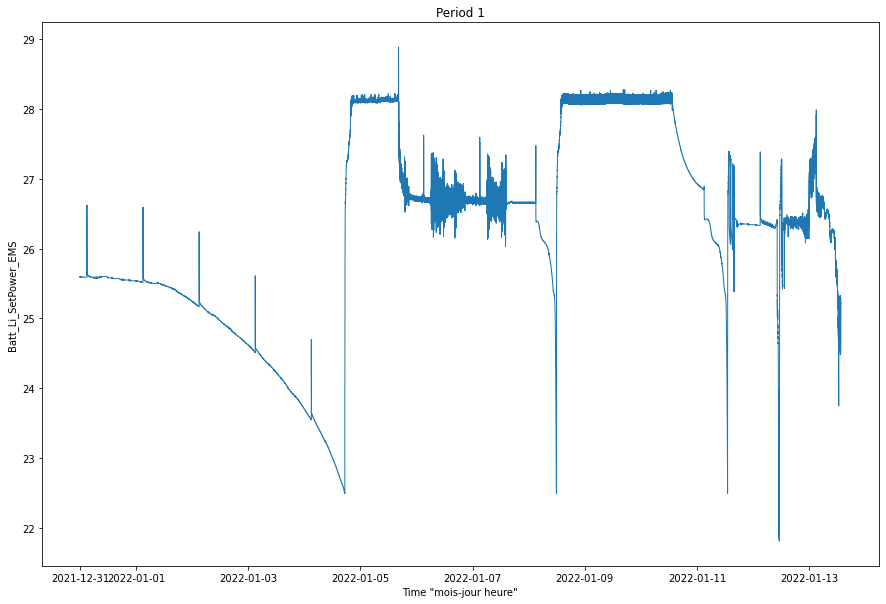

In [10]:
start_date = '2021-12-30 23:59:59'
end_date = '2022-01-13 13:30:00'

df_period = df.loc[(df['TIMESTAMP'] >= start_date) & (df['TIMESTAMP'] <= end_date), ['TIMESTAMP', 'Batt_Li_Voltage']]

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(df_period['TIMESTAMP'], df_period['Batt_Li_Voltage'], label='voltage',linewidth=1)


ax.set_title('Period 1')
ax.set_xlabel('Time "mois-jour heure"')
ax.set_ylabel('Batt_Li_SetPower_EMS')

pd.set_option('display.max_rows', None)

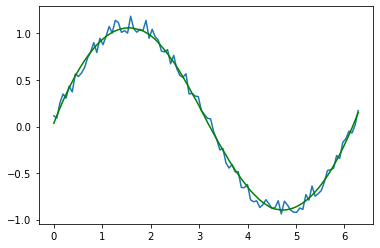

In [15]:
from scipy.signal import savgol_filter

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = savgol_filter(y, 51, 3)

plt.plot(x, y)
plt.plot(x,yhat, color='green')
plt.show()

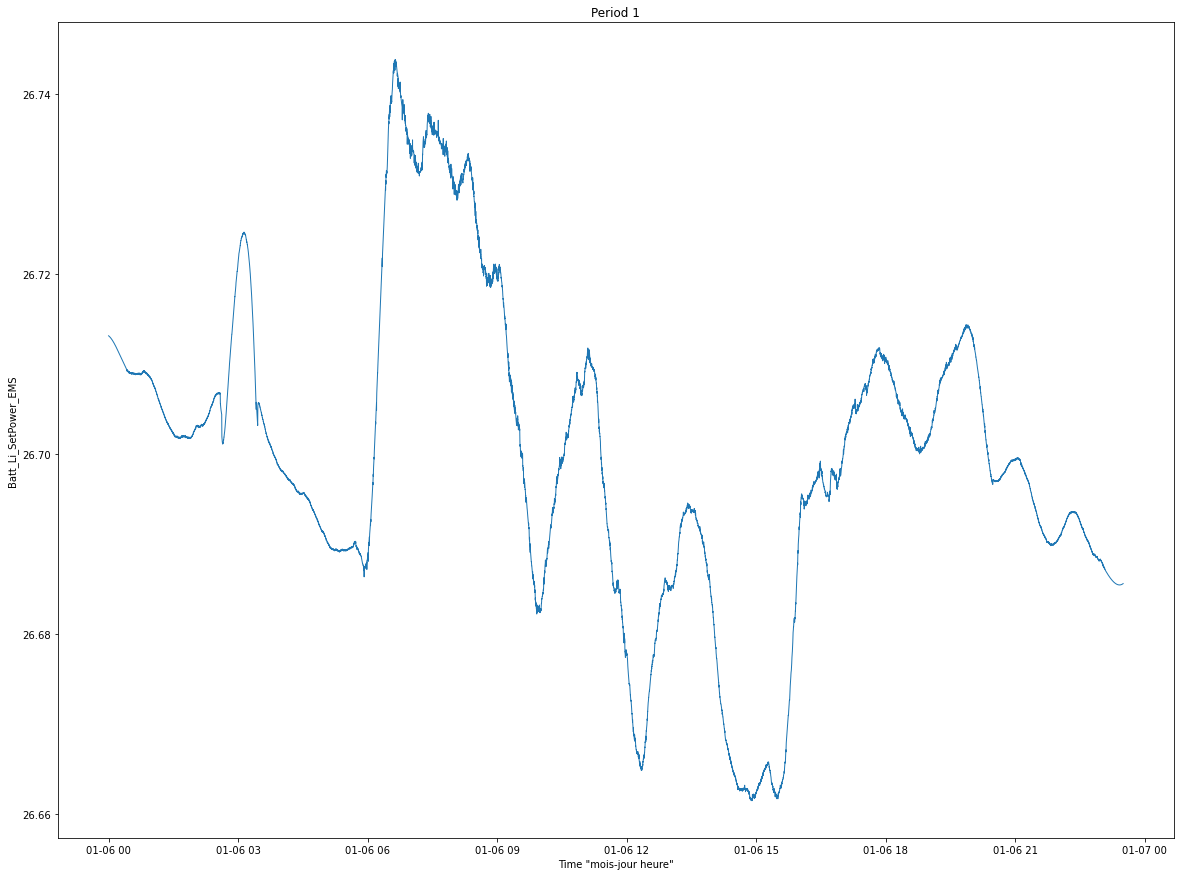

In [39]:
start_date = '2022-01-06 00:00:00'
end_date = '2022-01-06 23:30:00'

df_period = df.loc[(df['TIMESTAMP'] >= start_date) & (df['TIMESTAMP'] <= end_date), ['TIMESTAMP', 'Batt_Li_Voltage']]

fig, ax = plt.subplots(figsize=(20, 15))
a = len(df_period['Batt_Li_Voltage']-1)
Lisse = savgol_filter(df_period['Batt_Li_Voltage'],3001 , 3)

ax.plot(df_period['TIMESTAMP'], Lisse, label='voltage-lisse',linewidth=1)

ax.set_title('Period 1')
ax.set_xlabel('Time "mois-jour heure"')
ax.set_ylabel('Batt_Li_SetPower_EMS')

pd.set_option('display.max_rows', None)

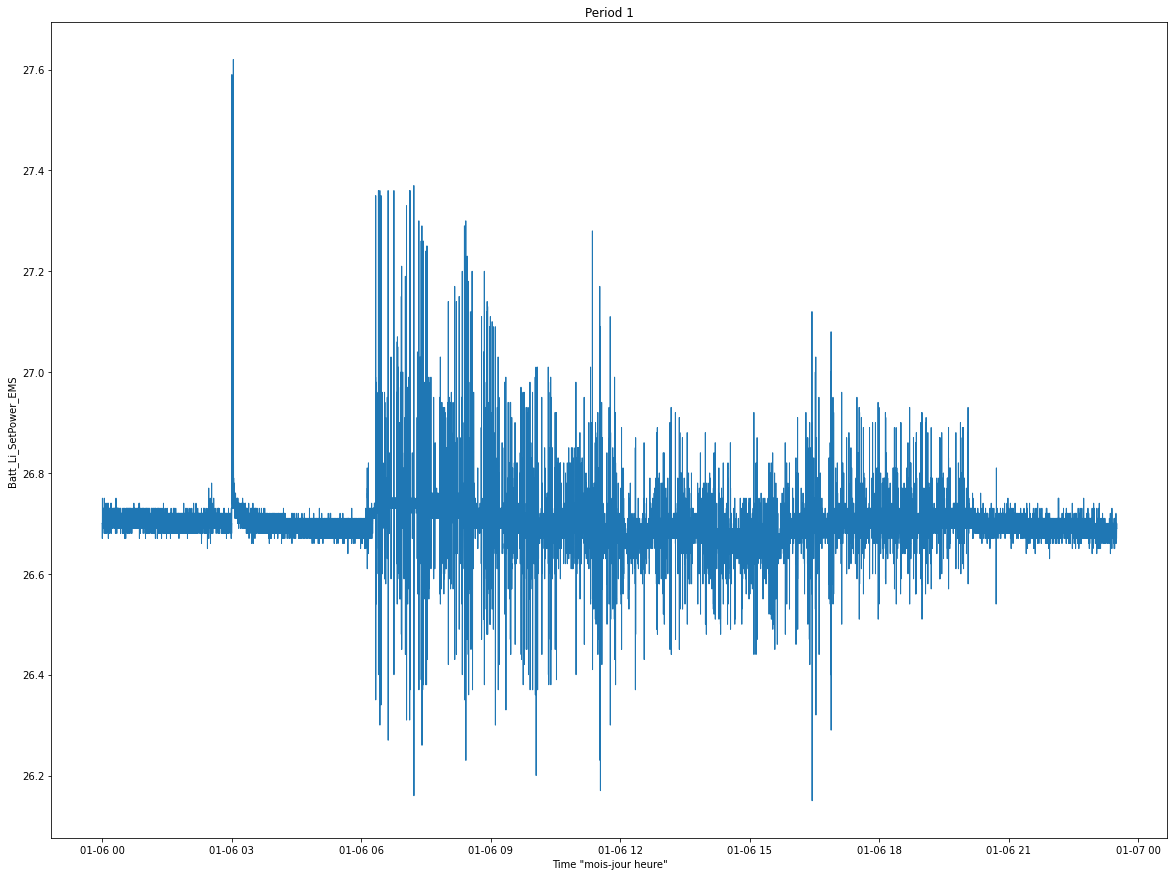

In [40]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.plot(df_period['TIMESTAMP'], df_period['Batt_Li_Voltage'], label='voltage',linewidth=1)

ax.set_title('Period 1')
ax.set_xlabel('Time "mois-jour heure"')
ax.set_ylabel('Batt_Li_SetPower_EMS')

pd.set_option('display.max_rows', None)

2937599


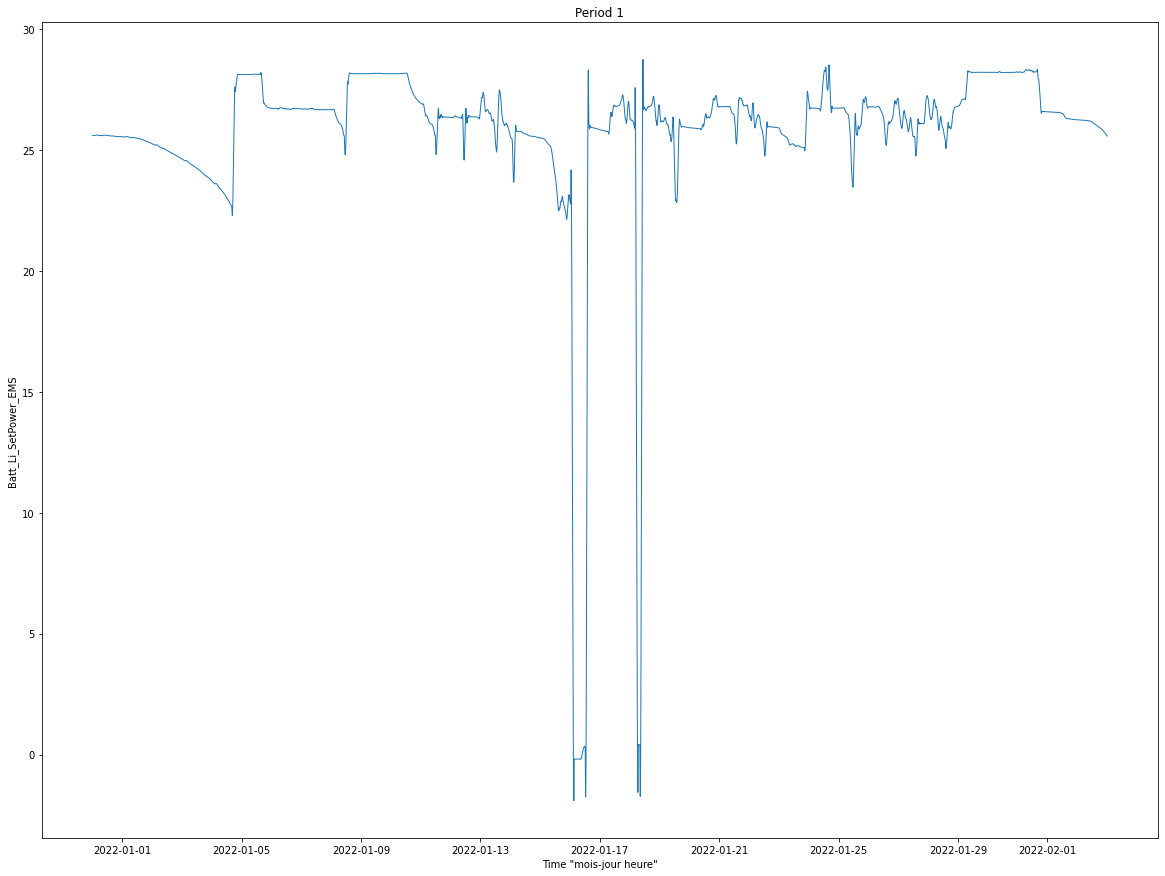

In [5]:
fig, ax = plt.subplots(figsize=(20, 15))
a = len(df['Batt_Li_Voltage']-1)
Lisse = savgol_filter(df['Batt_Li_Voltage'],10001 , 3)
print(a)
ax.plot(df['TIMESTAMP'], Lisse, label='voltage-lisse',linewidth=1)

ax.set_title('Period 1')
ax.set_xlabel('Time "mois-jour heure"')
ax.set_ylabel('Batt_Li_SetPower_EMS')

pd.set_option('display.max_rows', None)